Importing Face Mask Dataset

In [1]:
!gdown --id 1PCSuoagVUcYH1vak3OPO8MFrOMnWX3pC
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without_mask/without_mask_3298.jpg  
  inflating: data/without_mask/without_mask_3299.jpg  
  inflating: data/without_mask/without_mask_33.jpg  
  inflating: data/without_mask/without_mask_330.jpg  
  inflating: data/without_mask/without_mask_3300.jpg  
  inflating: data/without_mask/without_mask_3301.jpg  
  inflating: data/without_mask/without_mask_3302.jpg  
  inflating: data/without_mask/without_mask_3303.jpg  
  inflating: data/without_mask/without_mask_3304.jpg  
  inflating: data/without_mask/without_mask_3305.jpg  
  inflating: data/without_mask/without_mask_3306.jpg  
  inflating: data/without_mask/without_mask_3307.jpg  
  inflating: data/without_mask/without_mask_3308.jpg  
  inflating: data/without_mask/without_mask_3309.jpg  
  inflating: data/without_mask/without_mask_331.jpg  
  inflating: data/without_mask/without_mask_3310.jpg  
  inflating: data/without_mask/without_mask_3311.jpg  
  inflating: data/

In [2]:
!ls

data  data.zip	sample_data


**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1201.jpg', 'with_mask_2989.jpg', 'with_mask_2556.jpg', 'with_mask_3404.jpg', 'with_mask_630.jpg']
['with_mask_1466.jpg', 'with_mask_2480.jpg', 'with_mask_2097.jpg', 'with_mask_3226.jpg', 'with_mask_2947.jpg']


In [5]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3363.jpg', 'without_mask_1906.jpg', 'without_mask_1848.jpg', 'without_mask_2232.jpg', 'without_mask_2047.jpg']
['without_mask_3395.jpg', 'without_mask_213.jpg', 'without_mask_3481.jpg', 'without_mask_58.jpg', 'without_mask_3180.jpg']


In [6]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  0

without mask  -->  1

In [7]:
# create the labels

with_mask_labels = [0]*3725

without_mask_labels = [1]*3828

In [8]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


**Displaying the Images**

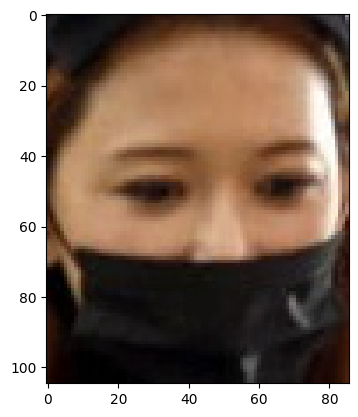

In [11]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
imgplot = plt.imshow(img)
plt.show()

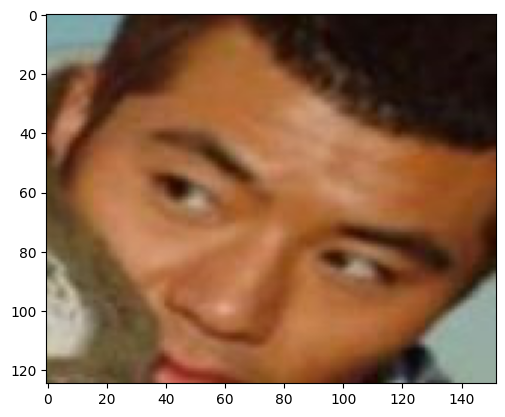

In [12]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [13]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((32,32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((32,32))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [14]:
type(data)

list

In [15]:
len(data)

7553

In [16]:
data[0]

array([[[ 65,  63,  66],
        [ 47,  44,  51],
        [ 49,  48,  51],
        ...,
        [ 78,  76,  79],
        [170, 168, 170],
        [203, 201, 201]],

       [[ 56,  52,  60],
        [ 59,  57,  66],
        [ 58,  58,  63],
        ...,
        [ 27,  25,  28],
        [ 58,  56,  59],
        [134, 132, 134]],

       [[ 52,  50,  60],
        [ 60,  58,  70],
        [ 62,  61,  67],
        ...,
        [ 30,  28,  31],
        [ 34,  32,  35],
        [ 39,  37,  41]],

       ...,

       [[ 11,  10,  13],
        [ 16,  16,  18],
        [ 19,  21,  23],
        ...,
        [ 30,  29,  35],
        [ 34,  33,  38],
        [ 37,  35,  40]],

       [[ 12,  12,  14],
        [ 18,  18,  20],
        [ 20,  22,  25],
        ...,
        [ 43,  42,  47],
        [ 40,  38,  43],
        [ 53,  52,  57]],

       [[ 19,  18,  19],
        [ 17,  15,  18],
        [ 20,  20,  22],
        ...,
        [ 37,  35,  40],
        [ 66,  63,  68],
        [166, 164, 169]]

In [17]:
type(data[0])

numpy.ndarray

In [18]:
data[0].shape

(32, 32, 3)

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
type(X)

numpy.ndarray

In [21]:
type(Y)

numpy.ndarray

In [22]:
print(X.shape)
print(Y.shape)

(7553, 32, 32, 3)
(7553,)


In [23]:
print(Y)

[0 0 0 ... 1 1 1]


**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 32, 32, 3) (6042, 32, 32, 3) (1511, 32, 32, 3)


In [26]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
X_train[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 54,  54,  54],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[127, 127, 127],
        [151, 151, 151],
        [174, 174, 174],
        ...,
        [ 95,  95,  95],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [144, 144, 144],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 52,  52,  52],
        ...,
        [ 60,  47,  49],
        [ 65,  59,  65],
        [ 17,  16,  21]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 46,  46,  46],
        ...,
        [ 49,  40,  42],
        [ 16,  16,  19],
        [ 12,  12,  14]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 35,  35,  35],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [28]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.21176471, 0.21176471, 0.21176471],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.49803922, 0.49803922, 0.49803922],
        [0.59215686, 0.59215686, 0.59215686],
        [0.68235294, 0.68235294, 0.68235294],
        ...,
        [0.37254902, 0.37254902, 0.37254902],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.56470588, 0.56470588, 0.56470588],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.20392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np

In [30]:

num_of_classes = 2
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=50)

Epoch 1/50
170/170 [==============================] - 16s 8ms/step - loss: 0.3953 - acc: 0.8304 - val_loss: 0.2298 - val_acc: 0.8959
Epoch 2/50
170/170 [==============================] - 1s 5ms/step - loss: 0.2365 - acc: 0.9169 - val_loss: 0.1628 - val_acc: 0.9455
Epoch 3/50
170/170 [==============================] - 1s 5ms/step - loss: 0.2051 - acc: 0.9264 - val_loss: 0.1288 - val_acc: 0.9620
Epoch 4/50
170/170 [==============================] - 1s 5ms/step - loss: 0.1708 - acc: 0.9399 - val_loss: 0.1175 - val_acc: 0.9554
Epoch 5/50
170/170 [==============================] - 1s 5ms/step - loss: 0.1573 - acc: 0.9450 - val_loss: 0.1033 - val_acc: 0.9719
Epoch 6/50
170/170 [==============================] - 1s 5ms/step - loss: 0.1328 - acc: 0.9542 - val_loss: 0.0836 - val_acc: 0.9736
Epoch 7/50
170/170 [==============================] - 1s 5ms/step - loss: 0.1191 - acc: 0.9625 - val_loss: 0.0838 - val_acc: 0.9719
Epoch 8/50
170/170 [==============================] - 1s 5ms/step - loss: 0

**Model Evaluation**

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 7ms/step - loss: 0.2160 - acc: 0.9709
Test Accuracy = 0.9708802103996277


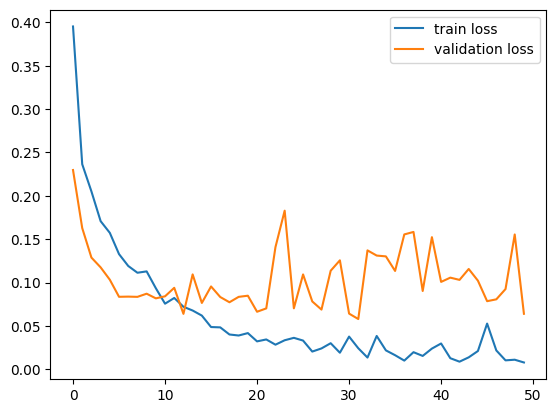

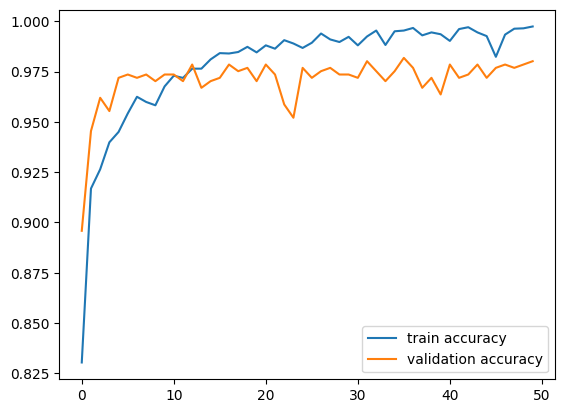

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/2-mask.jpg


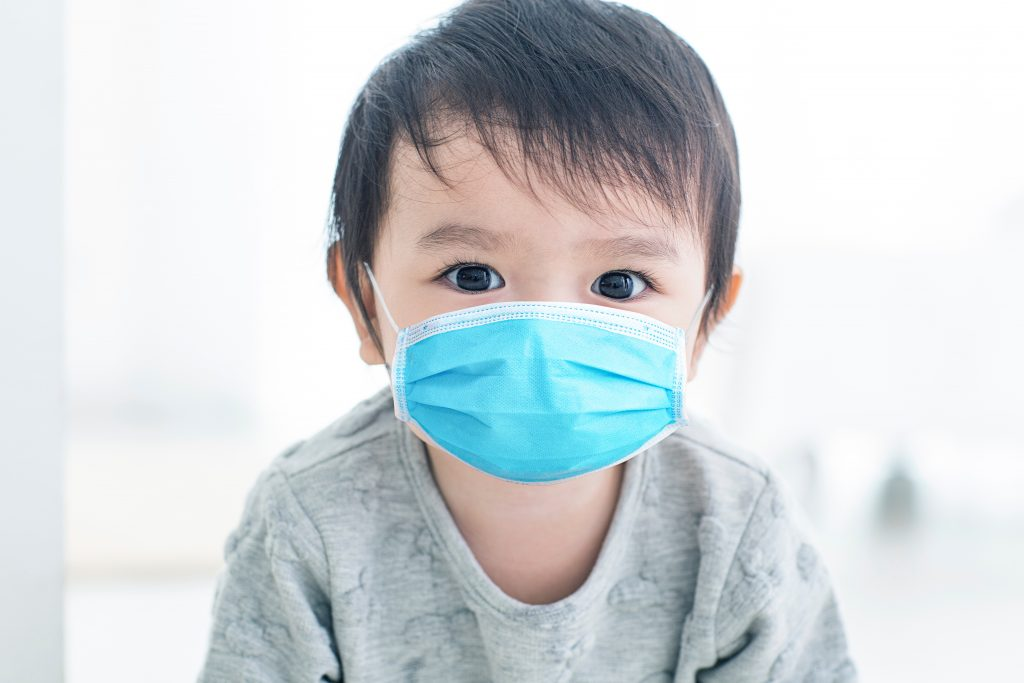

1/1 [==============================] - 0s 29ms/step
[[1.0000000e+00 6.4822284e-15]]
0
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/3.jpeg


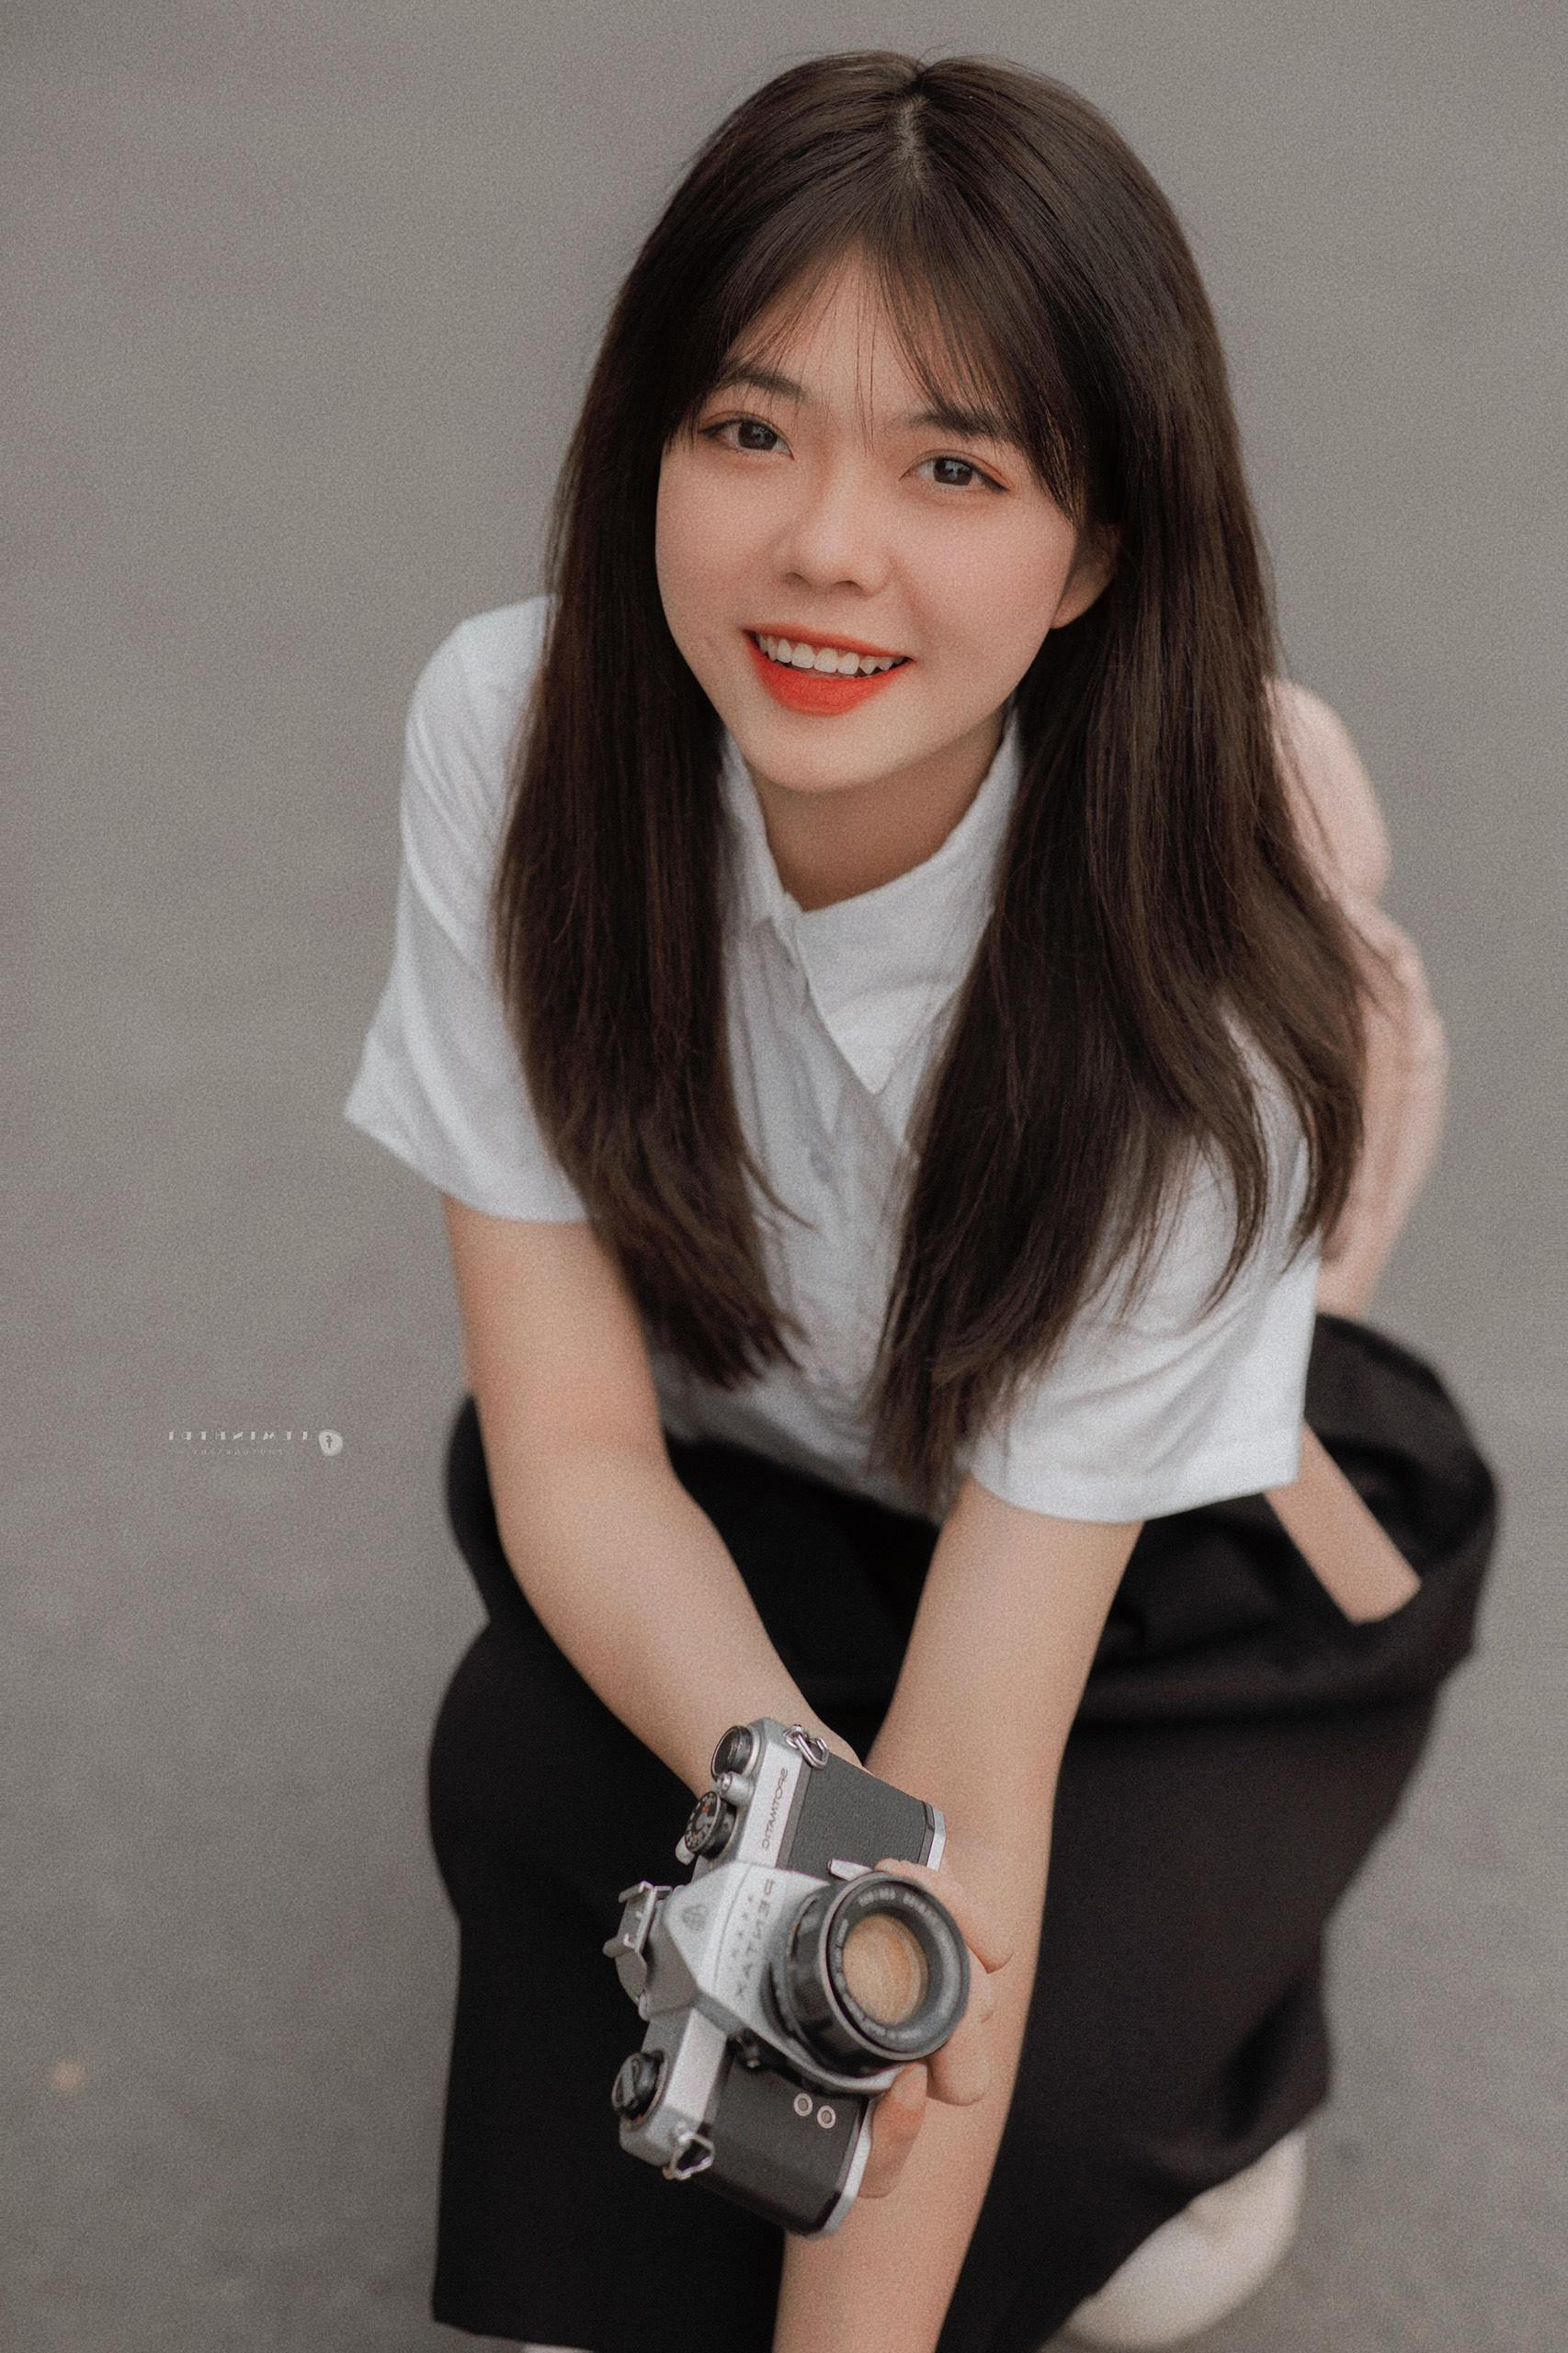

1/1 [==============================] - 0s 28ms/step
[[0.0056713 0.9943287]]
1
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (32,32))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,32,32,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

In [38]:
model.save('model.h5')